# Explorer le corpus de Camille apres selection: 
#### Requete: ("amour" OR "mariage" OR "relation" OR "liaison") AND ("homosexuel" OR "homosexuelle" OR "transgenre" OR "transsexuel" OR "changement de genre" OR "union libre" OR "couple atypique" OR "liaison interdite" OR "amour interdit" OR "liaison secrète")

## Imports

In [2]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np
import json 

In [23]:
# verification où on est
import os
os.getcwd()


'/Users/ilaria/Desktop/STIC/traitement_auto_corpus/tac/tps/tp4'

## Compter le nombre de documents dans le corpus

In [24]:
path = "../../data/txt_tp4"

files = sorted(os.listdir(path))
len(files)
print(f"Nombre total de fichiers dans le corpus : {len(files)}")

Nombre total de fichiers dans le corpus : 512


## Explorer les noms de fichier

Nous allons manipuler ici les chaines de caractères.

Il s'agit de la classe `str` en Python.

Pour en savoir plus : https://openclassrooms.com/fr/courses/235344-apprenez-a-programmer-en-python/231888-creez-votre-premier-objet-les-chaines-de-caracteres

## Comptage des fichiers par journal, décennie et mois

Ce bloc parcourt les fichiers du corpus, ignore ceux qui ne sont pas des articles, extrait le nom du journal, l'année et le mois, calcule la décennie, met à jour les compteurs par journal, décennie et mois, et signale les fichiers ou dates malformés.




In [5]:
for f in files:
    # Ignorer tout fichier qui ne commence pas par "KB_" ou ne se termine pas par ".txt"
    if not f.startswith("KB_") or not f.endswith(".txt"):
        continue
    
    elems = f.split("_")
    if len(elems) >= 3:
        newspaper = elems[1]
        date_parts = elems[2].split("-")
        if len(date_parts) >= 2:
            year = date_parts[0]
            month = int(date_parts[1])
            decade = year[:3] + "0s"

            count_decade[decade] += 1
            count_newspapers[newspaper] += 1
            count_month[month] += 1
            covered_years.add(year)
        else:
            print(f"Date malformed in file: {f}")
    else:
        print(f"Filename malformed: {f}")



NameError: name 'files' is not defined

In [69]:
# --- Dictionnaire code journal -> nom lisible ---
journal_names = {
    "JB427": "La Libre Belgique",
    "JB838": "Le Soir",
    "JB567": "L'Avenir",
    "JB555": "La Meuse",
    "JB572": "Le Peuple",
    "JB638": "Journal de Bruxelles",
    "JB685": "Journal de Charleroi",
    "JB729": "Le Petit Bleu",
    "JB773": "Vers l'Avenir",
    "JB837": "Le Vingtième Siècle",
    "JB421": "L'Indépendance belge",
    "JB1051": "L'Indépendance belge (édité en Angleterre)",
}

# Création des listes pour le graphique
journals = list(count_newspapers.keys())
counts_per_journal = [count_newspapers[j] for j in journals]
journal_labels = [journal_names.get(j, j) for j in journals]  # remplace code par nom lisible


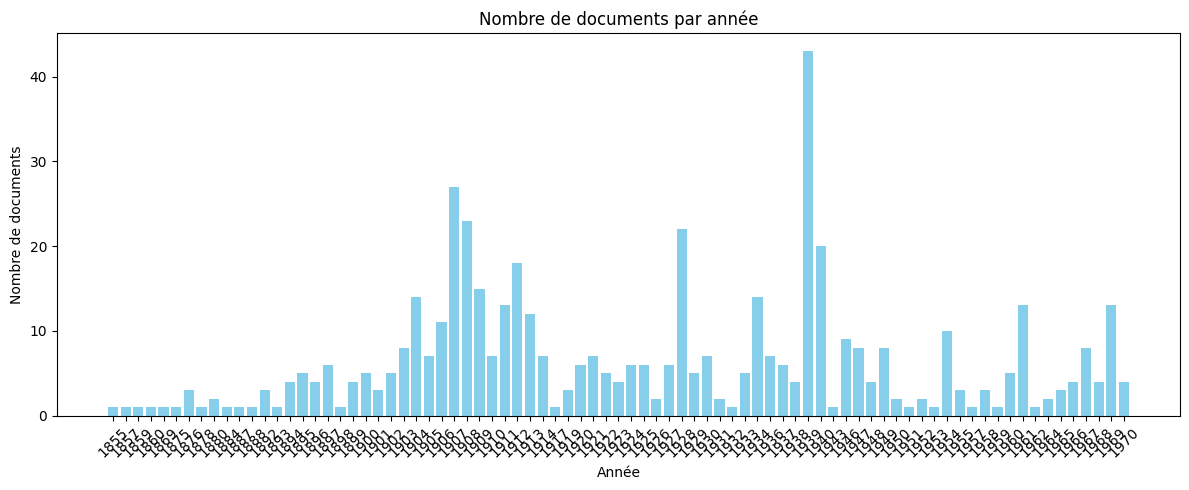

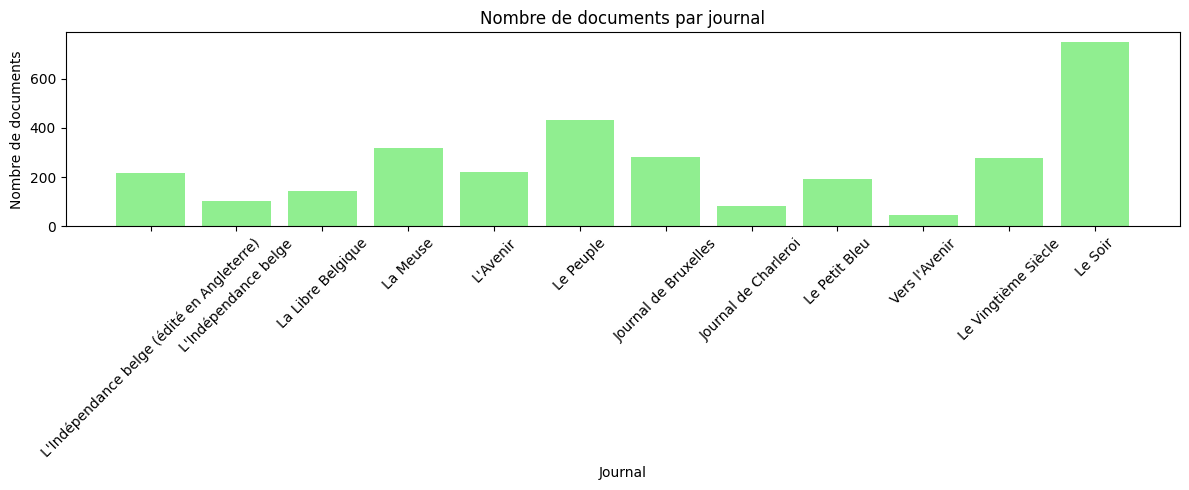

In [73]:
# --- Graphique 1 : Nombre de documents par année ---
years_sorted = sorted(covered_years)  # années couvertes triées
counts_per_year = [sum(1 for f in files if f.startswith("KB_") and f.endswith(".txt") and f.split("_")[2].split("-")[0] == y) for y in years_sorted]

plt.figure(figsize=(12, 5))
plt.bar(years_sorted, counts_per_year, color='skyblue')
plt.xlabel("Année")
plt.ylabel("Nombre de documents")
plt.title("Nombre de documents par année")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Graphique 2 : Nombre de documents par journal ---
journals = list(count_newspapers.keys())
counts_per_journal = [count_newspapers[j] for j in journals]
journal_labels = [journal_names.get(j, j) for j in journals]  # Remplace code par nom lisible

plt.figure(figsize=(12, 5))
plt.bar(journal_labels, counts_per_journal, color='lightgreen')
plt.xlabel("Journal")
plt.ylabel("Nombre de documents")
plt.title("Nombre de documents par journal")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Quelques statistiques

In [74]:
# Nombre d'articles par journal
print("Nombre d'articles par journal :")
for j, c in count_newspapers.items():
    print(f"{journal_names.get(j, j)}: {c}")

# Nombre d'articles par décennie
print("\nNombre d'articles par décennie :")
for d, c in count_decade.items():
    print(f"{d}: {c}")

# Nombre d'articles par mois
print("\nNombre d'articles par mois :")
for m, c in sorted(count_month.items()):
    print(f"Mois {m}: {c}")


Nombre d'articles par journal :
L'Indépendance belge (édité en Angleterre): 216
L'Indépendance belge: 102
La Libre Belgique: 144
La Meuse: 318
L'Avenir: 222
Le Peuple: 432
Journal de Bruxelles: 282
Journal de Charleroi: 84
Le Petit Bleu: 192
Vers l'Avenir: 48
Le Vingtième Siècle: 276
Le Soir: 750

Nombre d'articles par décennie :
1920s: 414
1940s: 300
1950s: 144
1960s: 318
1890s: 168
1900s: 708
1910s: 366
1930s: 534
1850s: 18
1870s: 30
1880s: 30
1860s: 12
1970s: 24

Nombre d'articles par mois :
Mois 1: 252
Mois 2: 264
Mois 3: 276
Mois 4: 198
Mois 5: 288
Mois 6: 210
Mois 7: 174
Mois 8: 120
Mois 9: 246
Mois 10: 552
Mois 11: 258
Mois 12: 228
